# Info
Name:  

    RST_2019_Hammer_proposal

Purpose:  

    Make a map plot of the location of a skyscan by 4STAR.
  
Input:

    none

Output:
   
    plots
  
Keywords:

    none
  
Dependencies:

    - numpy
    - matplotlib
    - scipy

  
Needed Files:

  - ...
    
History:

    Written: Samuel LeBlanc, Over North Dakota on the way to Paris, 2019-03-30
    

# Load python modules

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
import os
matplotlib.rc_file(os.path.join(os.getcwd(),'file.rc'))
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import Sp_parameters as Sp
from load_utils import mat2py_time, toutc, load_ict
from Sp_parameters import smooth
from linfit import linfit
from path_utils import getpath
from plotting_utils import make_boxplot
import hdf5storage as hs
from plotting_utils import prelim
from datetime import datetime
from scipy.interpolate import UnivariateSpline
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap

In [2]:
%matplotlib notebook

In [3]:
fp =getpath('ORACLES')#'C:/Userds/sleblan2/Research/ORACLES/'
fp

Return path named:  ORACLES /mnt/c/Users/sleblanc/Research/ORACLES/


u'/mnt/c/Users/sleblanc/Research/ORACLES/'

# Make the map

In [31]:
np.linspace(-15,-14,6)

array([-15. , -14.8, -14.6, -14.4, -14.2, -14. ])

In [43]:
def mapfig(ax=plt.gca()):
    m = Basemap(projection='merc',llcrnrlat=-8.2,urcrnrlat=-7.7,llcrnrlon=-14.6,urcrnrlon=-14,resolution='h',ax=ax)
    m.drawcoastlines()
    m.drawmeridians(np.linspace(-15,-14,6),labels=[0,0,0,1],linewidth=0.1)
    m.drawparallels(np.linspace(-8.2,-7.5,8),labels=[1,0,0,0],linewidth=0.1)
    m.shadedrelief(alpha=0.7)
    return m

In [48]:
fp

u'/mnt/c/Users/sleblanc/Research/ORACLES/'

<IPython.core.display.Javascript object>


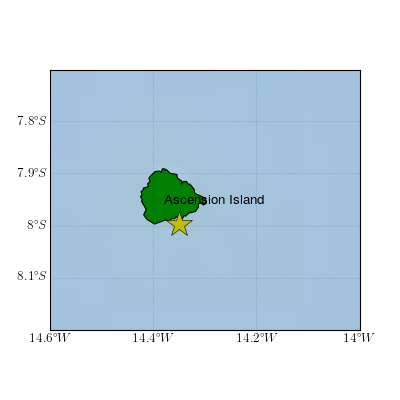

In [49]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
m = mapfig(ax=ax)
m.fillcontinents(color='g')
mx,my = m(-7.967,-14.350)
p = m.plot(-14.350,-7.997,'*y',latlon=True,markersize=24)
mx,my = m(-14.380,-7.957)
ax.text(mx,my,'Ascension Island')
#p = ax1.pcolor(mx,my,ar6['bin_mean'],vmin=0.0,vmax=0.8,cmap='plasma')
plt.savefig(fp+'Ascension_Island_location.png',dpi=600,transparent=True)

Help on method plot in module matplotlib.axes._axes:

plot(ax, *args, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    

In [19]:
help(m.plot)

Help on method plot in module mpl_toolkits.basemap:

plot(self, x, y, *args, **kwargs) method of mpl_toolkits.basemap.Basemap instance
    Draw lines and/or markers on the map
    (see matplotlib.pyplot.plot documentation).
    
    If ``latlon`` keyword is set to True, x,y are intrepreted as
    longitude and latitude in degrees.  Data and longitudes are
    automatically shifted to match map projection region for cylindrical
    and pseudocylindrical projections, and x,y are transformed to map
    projection coordinates. If ``latlon`` is False (default), x and y
    are assumed to be map projection coordinates.
    
    Extra keyword ``ax`` can be used to override the default axis instance.
    
    Other \**kwargs passed on to matplotlib.pyplot.plot.



In [35]:
   help(m.fillcontinents)

Help on method fillcontinents in module mpl_toolkits.basemap:

fillcontinents(self, color='0.8', lake_color=None, ax=None, zorder=None, alpha=None) method of mpl_toolkits.basemap.Basemap instance
    Fill continents.
    
    .. tabularcolumns:: |l|L|
    
    ==============   ====================================================
    Keyword          Description
    ==============   ====================================================
    color            color to fill continents (default gray).
    lake_color       color to fill inland lakes (default axes background).
    ax               axes instance (overrides default axes instance).
    zorder           sets the zorder for the continent polygons (if not
                     specified, uses default zorder for a Polygon patch).
                     Set to zero if you want to paint over the filled
                     continents).
    alpha            sets alpha transparency for continent polygons
    ==============   ================